In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [17]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = "06"
results = session.query(Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date)== date_str).all()
results[:5]


[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,)]

In [18]:
# 2. Convert the June temperatures to a list.
date_str = "06"
results1 = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date)== date_str).all()
results1[:5]



[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0)]

In [11]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_df= pd.DataFrame(results1, columns=["Date","Tobs"])
june_df.head()

,Date,Tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [12]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()


,Tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics
#checks out

## D2: Determine the Summary Statistics for December

In [20]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
date_str = "12"
results3 = session.query( Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date)== date_str).all()
results3[:5]


[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,)]

In [21]:
# 7. Convert the December temperatures to a list.
date_str = "12"
results4 = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date)== date_str).all()
results4[:5]


[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0)]

In [33]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df= pd.DataFrame(results4, columns=["Date","Tobs"])
dec_df.tail()

,Date,Tobs
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0
1516,2016-12-31,65.0


In [23]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [24]:
june_df.describe()

,Tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [32]:
# 10. Return to your challenge instructions to compare your summary statistics
#checks out
date_str = "06"
results11 = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date)== date_str).all()
results11
june_test_df= pd.DataFrame(results11, columns=["Date","prcp","Tobs"])
june_test_df.describe()

,prcp,Tobs
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [31]:
date_str = "12"
results12 = session.query(Measurement.date, Measurement.tobs,Measurement.prcp).\
    filter(func.strftime("%m",Measurement.date)== date_str).all()

dec_test_df= pd.DataFrame(results12, columns=["Date","Tobs","prcp"])
dec_test_df.describe()

,Tobs,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [ ]:
results33 = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)
print(results33.all())

In [41]:
df=pd.DataFrame(results33,columns=["date","prcp","tobs"])


In [42]:
df=df.dropna()


In [43]:
df.describe()

,prcp,tobs
count,18103.000000,18103.000000
mean,0.160644,72.994863
std,0.468746,4.512107
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


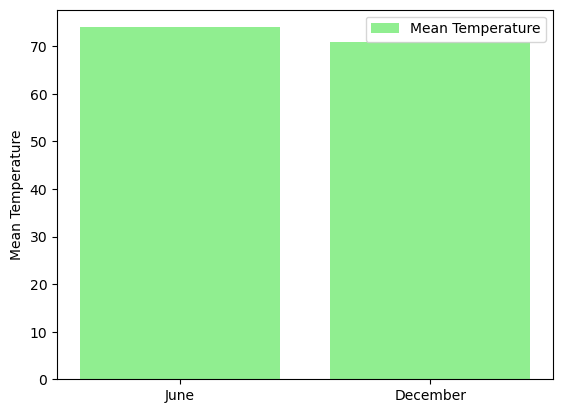

In [48]:
import matplotlib.pyplot as plt
y= [74,71]
x=["June","December"]
plt.bar(x,y, color="lightgreen", label="Mean Temperature")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig("Mean temperature June Dec.png")
plt.show()

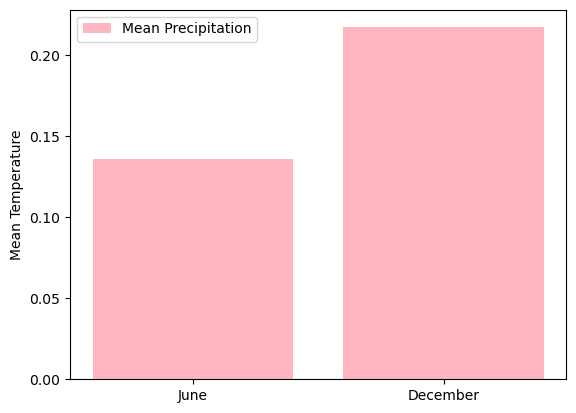

In [50]:
y= [.136,.217]
x=["June","December"]
plt.bar(x,y, color="lightpink", label="Mean Precipitation")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig("Mean precipitation June Dec.png")
plt.show()